<a href="https://colab.research.google.com/github/Nivas-DS/Income-Evaluation-ML-Model/blob/main/Income_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data set link
# https://drive.google.com/file/d/1_CkVYyKh_qta2XIFu6m06KgDjotRrhmF/view?usp=drive_link

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score,precision_score,recall_score

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Data Sets/Copy of DS DATA.csv')
data.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [ ]:
print(f'Data has {data.shape[0]} rows and {data.shape[1]} columns')

Data has 32561 rows and 16 columns


In [ ]:
data_val=pd.DataFrame({'DataTypes':data.dtypes,
                       'Missing_Val_per':round(data.isnull().mean(),2)*100})
s_data=data.head(2).T
s_data.rename(columns={0:'Sample_1',1:'Sample_2'},inplace=True)

data_val=pd.concat([data_val,s_data],axis=1)

In [ ]:
data_val

,DataTypes,Missing_Val_per,Sample_1,Sample_2
Age,int64,0.0,39,50
Profession Class,object,0.0,State-gov,Self-emp-not-inc
Final_census,int64,0.0,77516,83311
Education,object,0.0,Bachelors,Bachelors
Education-num,int64,0.0,13,13
marital-status,object,0.0,Never-married,Married-civ-spouse
occupation,object,0.0,Adm-clerical,Exec-managerial
relationship,object,0.0,Not-in-family,Husband
race,object,0.0,White,White
Gender,object,0.0,Male,Male


As 'Unnamed: 15' Column has all the missing values removing that column

In [ ]:
data=data.drop('Unnamed: 15',axis=1)

In [ ]:
data.shape

(32561, 15)

The Column names have some extra spaces removed by strip()

In [ ]:
data.columns=data.columns.str.strip()

Created lists for both numerical & categorical coulmns

In [ ]:
#num & cat columns
num_cols=[cols for cols in data.columns if data.dtypes[cols]!='O' ]
cat_cols=[cols for cols in data.columns if data.dtypes[cols]=='O' ]


In [ ]:
print(len(num_cols),'\n',num_cols)
print(len(cat_cols),'\n',cat_cols)

6 
 ['Age', 'Final_census', 'Education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
9 
 ['Profession Class', 'Education', 'marital-status', 'occupation', 'relationship', 'race', 'Gender', 'country', 'income']


Removed the duplicate rows

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data[data.duplicated()].shape[0]

0

In [ ]:
# Analysing Cat_cols
for cols in cat_cols:
  if data[cols].nunique()==1:
    print(f'**{cols} has 1 Unique Values**')
  else:
    print(f'{cols} has {data[cols].nunique()} Unique Values')

Profession Class has 9 Unique Values
Education has 16 Unique Values
marital-status has 7 Unique Values
occupation has 15 Unique Values
relationship has 6 Unique Values
race has 5 Unique Values
Gender has 2 Unique Values
country has 42 Unique Values
income has 2 Unique Values


Did the above analysis to see if any cat_cols has 1 unique value if so we can remove that

In [ ]:
for cols in cat_cols:
  print(cols,data[cols].value_counts())
  print()

Profession Class Profession Class
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Education Education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

marital-status marital-status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

occupation occupation
Prof-speci

From the above observation we have seen that some cat_cols has data '?' which is also a missing so replacing it with mode

In [ ]:
data.columns

Index(['Age', 'Profession Class', 'Final_census', 'Education', 'Education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'Gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income'],
      dtype='object')

In [ ]:
cols=['Profession Class','occupation','country']
# the above cols has '?' data
for i in cols:
  data[i]=data[i].str.strip().replace('?',data[i].mode()[0])

In [ ]:
#after replacing miising value(?) with mode
for cols in cat_cols:
  print(cols,data[cols].value_counts())
  print()

Profession Class Profession Class
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
 Private             1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Education Education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

marital-status marital-status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

occupation occupation
Prof-speci

In [ ]:
for cols in num_cols:
  print(data[cols].value_counts())
  print()

Age
36    898
31    888
34    886
23    876
35    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

Final_census
123011    13
203488    13
164190    13
126675    12
148995    12
          ..
148751     1
212302     1
169885     1
112780     1
327112     1
Name: count, Length: 21648, dtype: int64

Education-num
9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: count, dtype: int64

capital-gain
0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
6097         1
1639         1
7978         1
2387         1
5060         1
Name: count, Length: 119, dtype: int64

capital-loss
0       31018
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2467        1
2163        1
2472        1
1411        1
Name: count, Length: 92, dtype:

From the above we can see the num_cols has only numeric data and no missing values

In [ ]:
#analysing num_cols
for cols in num_cols:
  if data[cols].nunique in [1,data.shape[0]]:
    print(f'**{cols} has {data[cols].nunique()} Unique Values**')
  else:
    print(f'{cols} has {data[cols].nunique()} Unique Values')

Age has 73 Unique Values
Final_census has 21648 Unique Values
Education-num has 16 Unique Values
capital-gain has 119 Unique Values
capital-loss has 92 Unique Values
hours-per-week has 94 Unique Values


In [ ]:
data.dtypes

,0
Age,int64
Profession Class,object
Final_census,int64
Education,object
Education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
Gender,object


all have the correct data types

UNIVARIANT ANALYSIS

In [ ]:
data['income'].value_counts()
# The target column is imbalance

,count
income,
<=50K,24698
>50K,7839


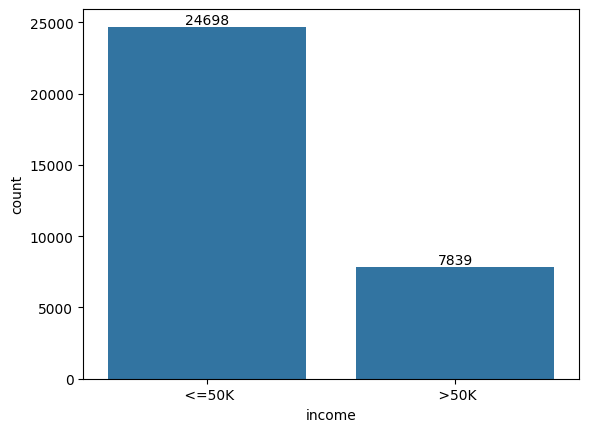

In [ ]:
ax=sns.countplot(x=data['income'],order=data['income'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

The target column is imbalance

In [ ]:
data.describe()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


from the above we can almost say that 'captail_gain','captail_loss','final_census' columns will having the more skewness as mean is very far from median

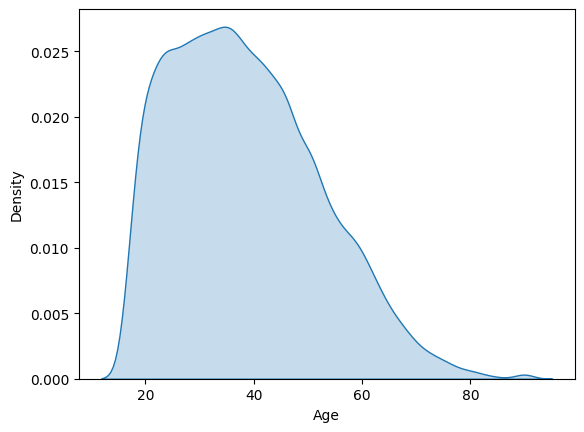

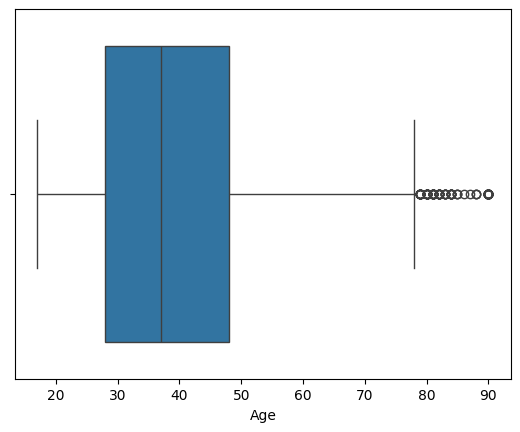

Numerical Summary
Mean:  38.585548759873376
Median:  37.0
90 % data  58.0
99 % data  74.0
100 % data  90.0


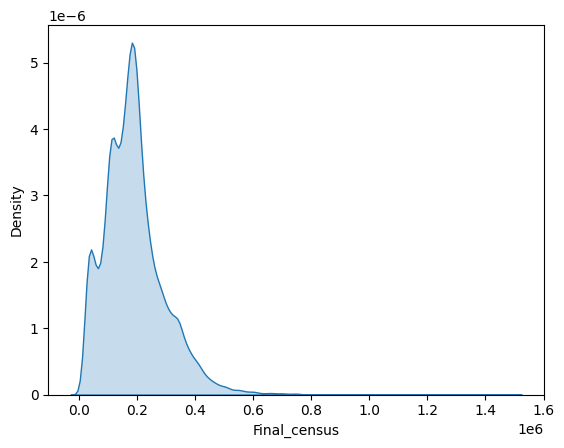

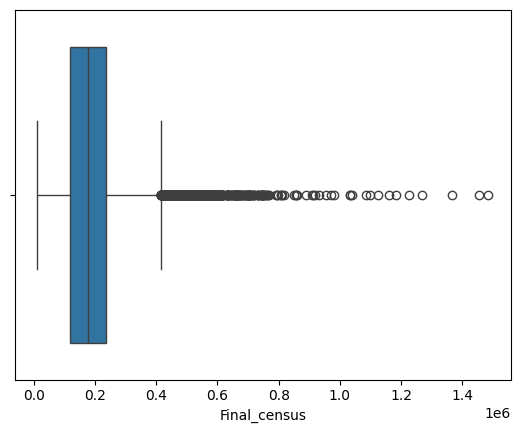

Numerical Summary
Mean:  189780.84851092604
Median:  178356.0
90 % data  329056.0
99 % data  510072.0
100 % data  1484705.0


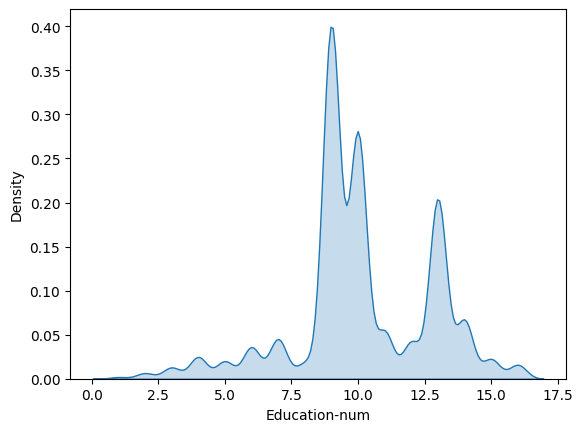

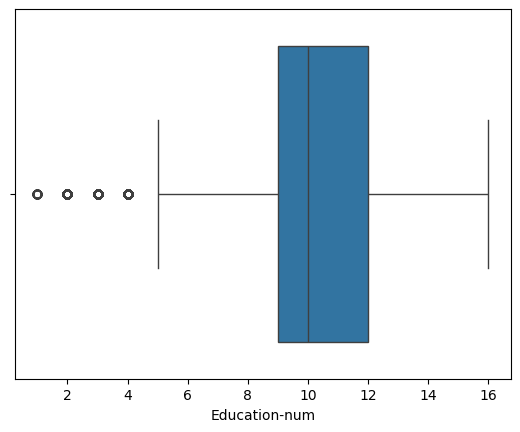

Numerical Summary
Mean:  10.081814549589698
Median:  10.0
90 % data  13.0
99 % data  16.0
100 % data  16.0


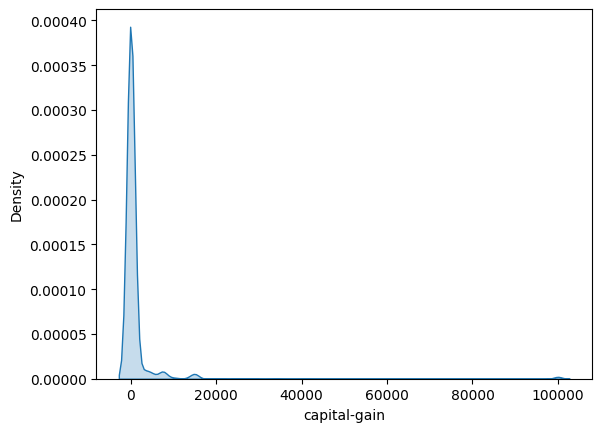

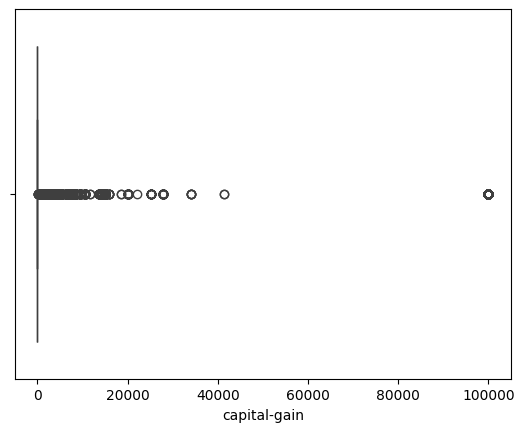

Numerical Summary
Mean:  1078.4437409718166
Median:  0.0
90 % data  0.0
99 % data  15024.0
100 % data  99999.0


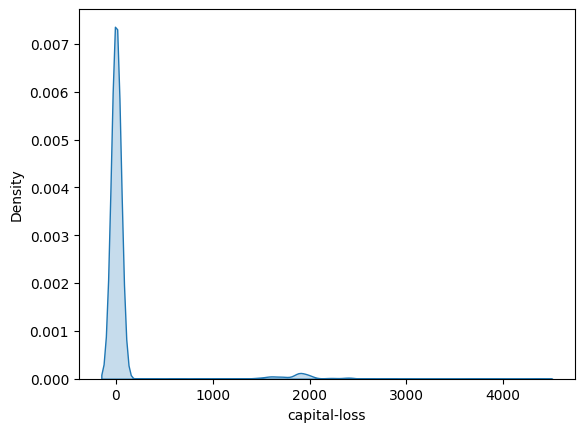

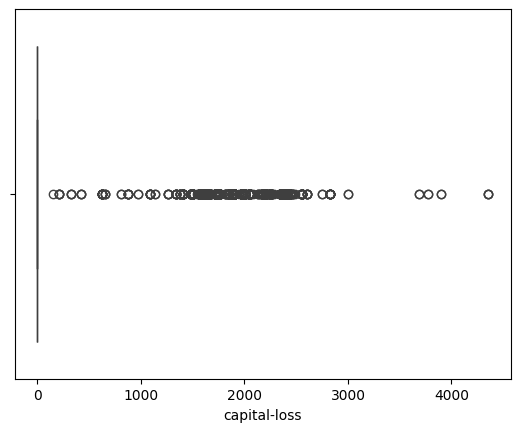

Numerical Summary
Mean:  87.36822694163568
Median:  0.0
90 % data  0.0
99 % data  1980.0
100 % data  4356.0


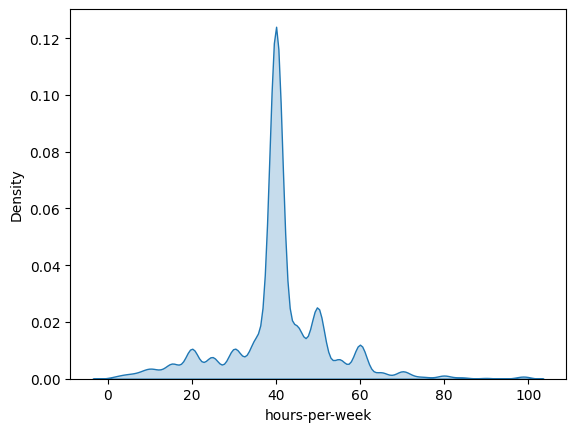

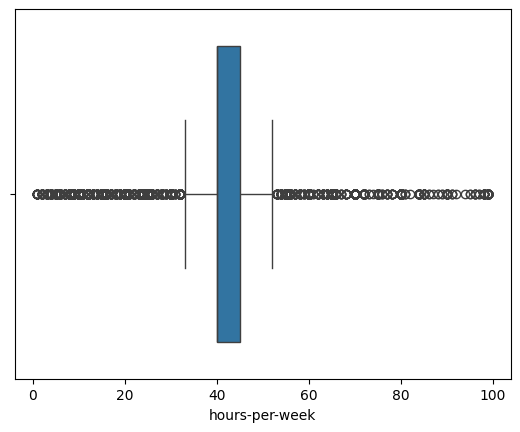

Numerical Summary
Mean:  40.44032947106371
Median:  40.0
90 % data  55.0
99 % data  80.0
100 % data  99.0


In [ ]:
for cols in num_cols:
  sns.kdeplot(data[cols],fill=True)
  plt.show()
  sns.boxplot(data[cols],orient='h')
  plt.show()
  print('Numerical Summary')
  print('Mean: ',data[cols].mean())
  print('Median: ',data[cols].median())
  print('90 % data ',data[cols].quantile(0.9))
  print('99 % data ',data[cols].quantile(0.99))
  print('100 % data ',data[cols].quantile(1))


From the above univariant analysis of num_cols observations are:

1.'Final_census' has outiliers in the upper_fence and there is huge jump b.w 99% to 100% data which can be trimmed and the max 'final_census' is only  in one case from db.

2.Most of the people has the 'education_num' b.w 9 to 12.

3.'captail_gain' & 'captail_loss' has outiliers in the upper_fence and there is huge jump b.w 99% to 100% data which can be trimmed, but it has count of 153 so we wont tri this


3.'Hours per week' has more in range of 30-50 hrs

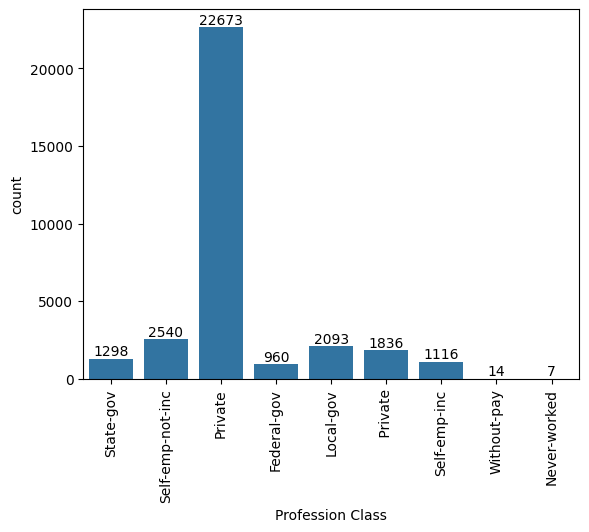

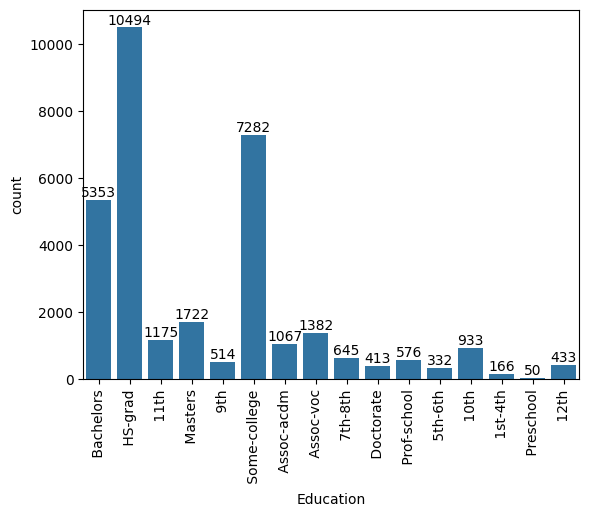

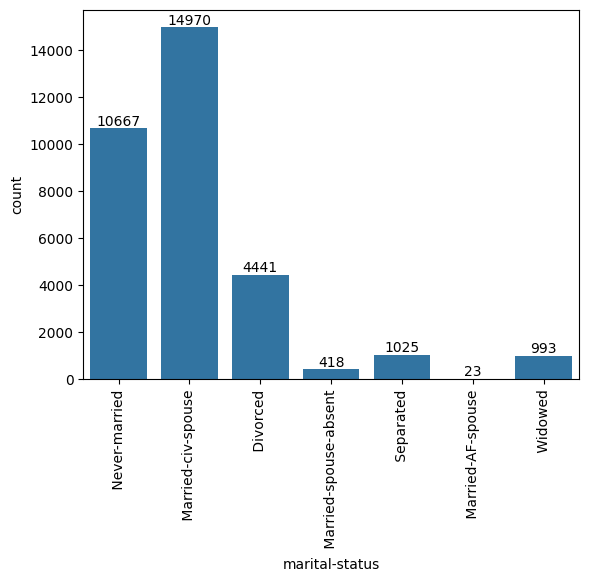

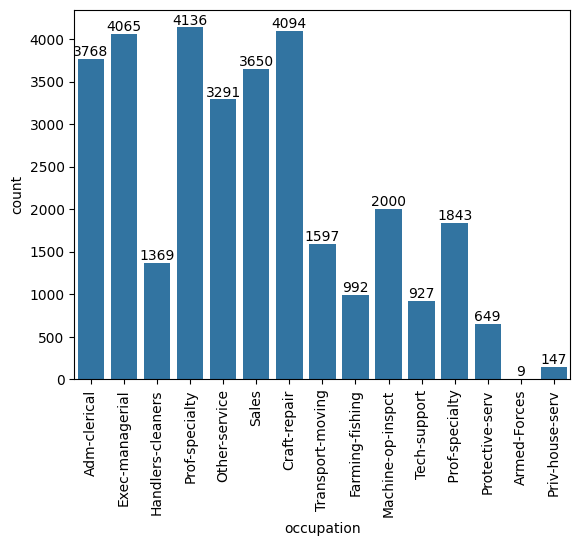

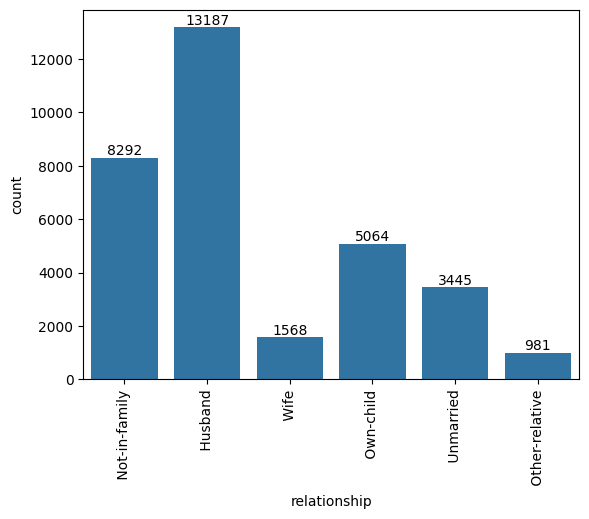

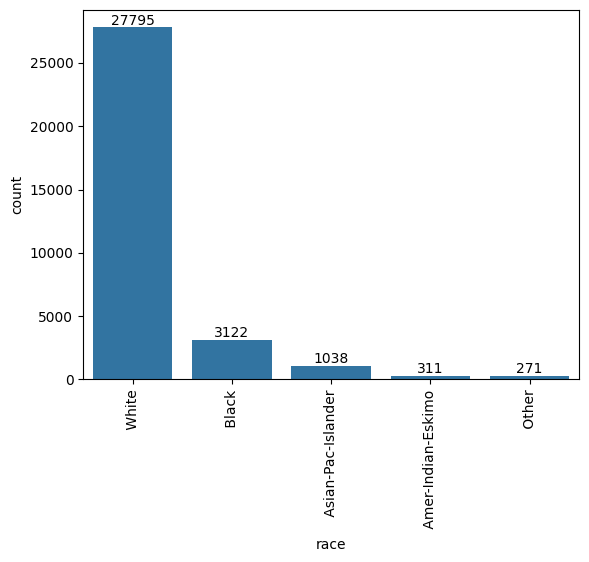

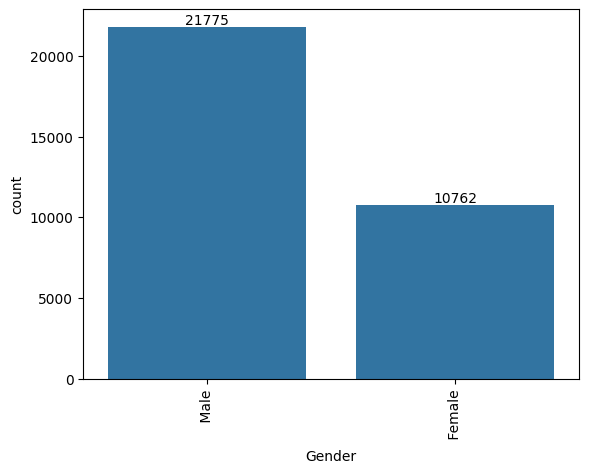

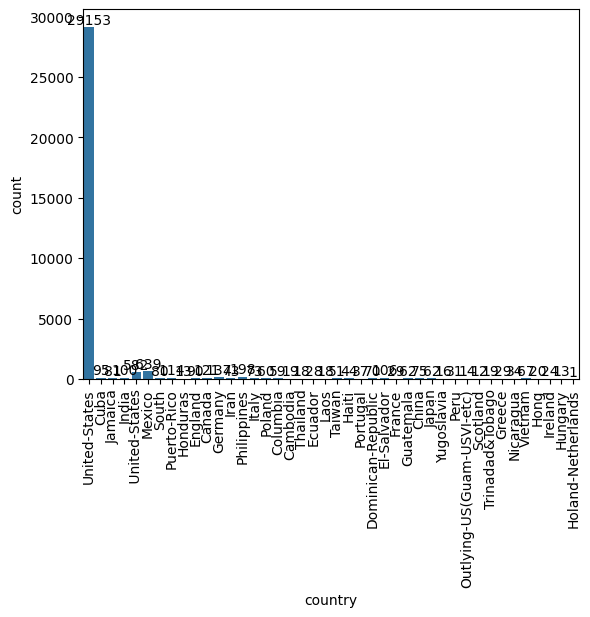

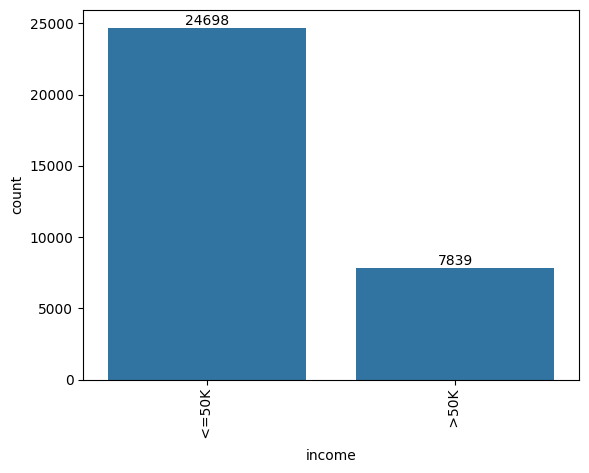

In [ ]:
for cols in cat_cols:
  ax=sns.countplot(x=data[cols])
  ax.bar_label(ax.containers[0])
  plt.xticks(rotation=90)
  plt.show()

Observations on cat_cols:

1.In 'Education' Col almost 80% of people belong to 'HS-grad' and 'some-college' and least are pre-school

2.In 'Marital-status' col has more marreied-civ-spouse and then followed by never married

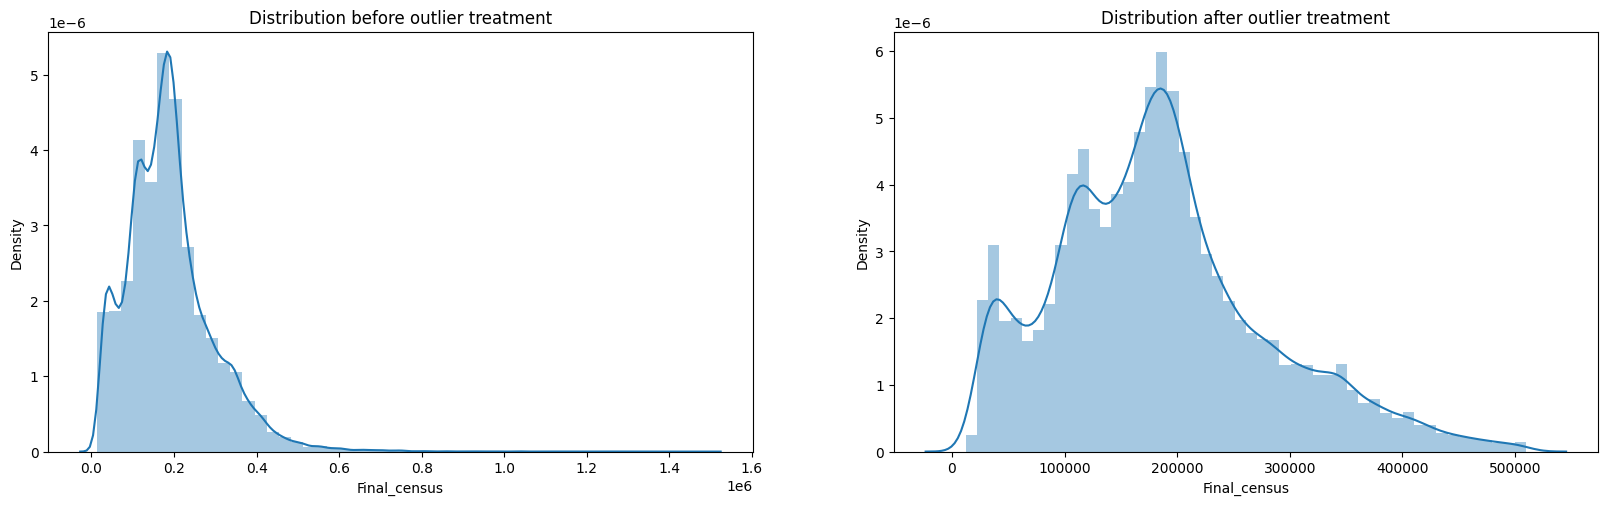

In [ ]:
# outlier tratment on final_census column

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
ax=sns.distplot(data['Final_census'])
ax.set_title('Distribution before outlier treatment')

data=data[data['Final_census']<data['Final_census'].quantile(0.99)]

plt.subplot(2,2,2)
ax=sns.distplot(data['Final_census'])
ax.set_title('Distribution after outlier treatment')
plt.show()

BIVARIANT ANALYSIS

In [ ]:
data.describe()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
count,32209.000000,32209.000000,32209.000000,32209.000000,32209.000000,32209.000000
mean,38.615045,185258.419293,10.085597,1079.767549,87.698035,40.445403
std,13.647226,94851.634987,2.569362,7399.908306,403.916796,12.355057
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117496.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,177437.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,234504.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,509866.000000,16.000000,99999.000000,4356.000000,99.000000


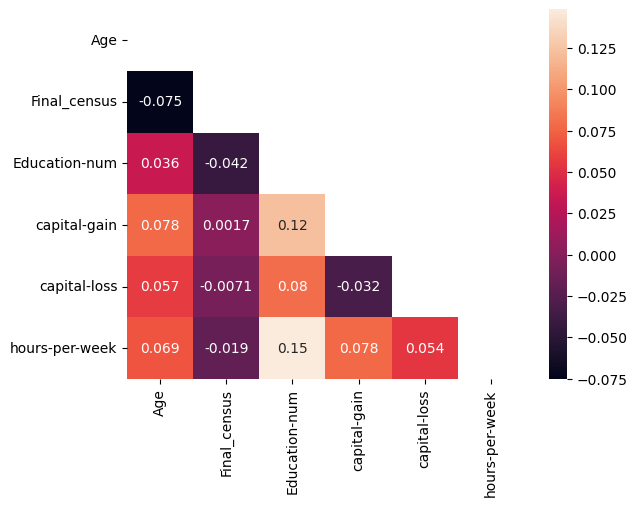

In [ ]:
corr=data.corr(numeric_only=True)
mask=np.triu(corr)
sns.heatmap(corr,annot=True,mask=mask)
plt.show()

From the above heat map  no column has a stong corr but captail-gain & ed_num , cap-gain & hours_per_week has relation among all

In [ ]:
data.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
x=data.iloc[:,:14]
y=data['income']

In [ ]:
y=y.str.strip().map({'<=50K':0,'>50K':1})

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(25767, 14) (25767,)
(6442, 14) (6442,)


In [ ]:
cat_cols[:-1]

['Profession Class',
 'Education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'Gender',
 'country']

In [ ]:
encoders={}

for col in cat_cols[:-1]:
  encoders[col]=LabelEncoder()
  x_train[col]=encoders[col].fit_transform(x_train[col])

for col in cat_cols[:-1]:
  x_test[col]=encoders[col].transform(x_test[col])

In [ ]:
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)
print(round(model.score(x_train,y_train),2)*100,' is the training score')

100.0  is the training score


In [ ]:
y_pred=model.predict(x_test)
print(round(accuracy_score(y_test,y_pred),2)*100,'is the accuracy score')

81.0 is the accuracy score


              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4845
           1       0.61      0.63      0.62      1597

    accuracy                           0.81      6442
   macro avg       0.74      0.75      0.75      6442
weighted avg       0.81      0.81      0.81      6442



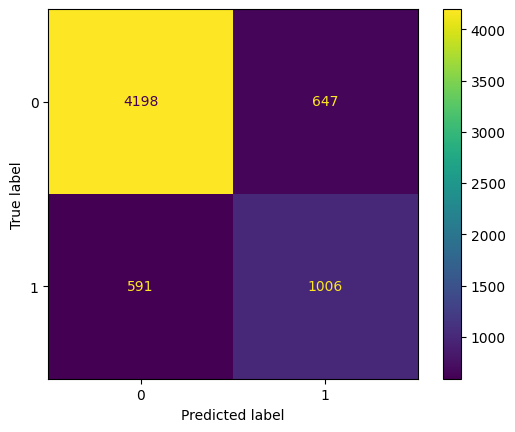

In [ ]:
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(classification_report(y_test,y_pred))

In [ ]:
params={'max_depth':list(range(1,14)),
        'min_samples_leaf':list(range(2,9)),
        'min_samples_split':list(range(1,5))}

dt=DecisionTreeClassifier(random_state=42)

grid_search=GridSearchCV(estimator=dt,
                         param_grid=params,
                         cv=5,
                         n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [1, 2, 3, 4]})

In [ ]:
print(grid_search.best_params_,'are the best params')
print('score for the best params',round(grid_search.best_score_,2)*100,'%')

{'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 2} are the best params
score for the best params 86.0 %


In [ ]:
b_params=grid_search.best_params_
dt_final=DecisionTreeClassifier(**b_params,random_state=42)

dt_final.fit(x_train,y_train)
print(round(dt_final.score(x_train,y_train),2)*100,' is the training score')

86.0  is the training score


In [ ]:
y_pred_dt=dt_final.predict(x_test)
print(round(accuracy_score(y_test,y_pred_dt),2)*100,'is the accuracy score')

85.0 is the accuracy score


              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4845
           1       0.76      0.57      0.65      1597

    accuracy                           0.85      6442
   macro avg       0.82      0.76      0.78      6442
weighted avg       0.84      0.85      0.84      6442



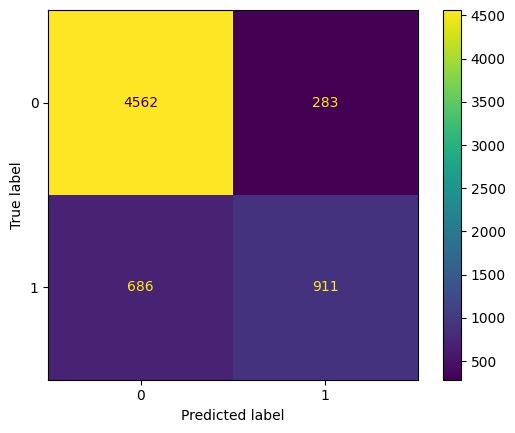

In [ ]:
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)
print(classification_report(y_test,y_pred_dt))

There is a huge diff in f1 scores of both classes due to class imbalance so will do SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE(random_state=42)

x_train_sm,y_train_sm=smote.fit_resample(x_train,y_train)

In [ ]:
y_train_sm.value_counts(normalize=True)*100

,proportion
income,
0,50.0
1,50.0


In [ ]:
params={'max_depth':list(range(1,14)),
        'min_samples_leaf':list(range(2,9)),
      'min_samples_split':list(range(1,5)),
        'criterion':['gini','entropy']}

dt=DecisionTreeClassifier(random_state=42)

grid_search=GridSearchCV(estimator=dt,
                         param_grid=params,
                         cv=5,
                         n_jobs=-1)
grid_search.fit(x_train_sm,y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [1, 2, 3, 4]})

In [ ]:
print(grid_search.best_params_,'are the best params')
print('score for the best params',round(grid_search.best_score_,2)*100,'%')

{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 2} are the best params
score for the best params 86.0 %


In [ ]:
b_params=grid_search.best_params_
dt_final=DecisionTreeClassifier(**b_params,random_state=42)

dt_final.fit(x_train_sm,y_train_sm)
print(round(dt_final.score(x_train_sm,y_train_sm),2)*100,' is the training score')

90.0  is the training score


In [ ]:
y_pred_fi=dt_final.predict(x_test)
print(round(accuracy_score(y_test,y_pred_fi),2)*100,'is the accuracy score')

82.0 is the accuracy score


              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4845
           1       0.63      0.70      0.66      1597

    accuracy                           0.82      6442
   macro avg       0.76      0.78      0.77      6442
weighted avg       0.83      0.82      0.83      6442



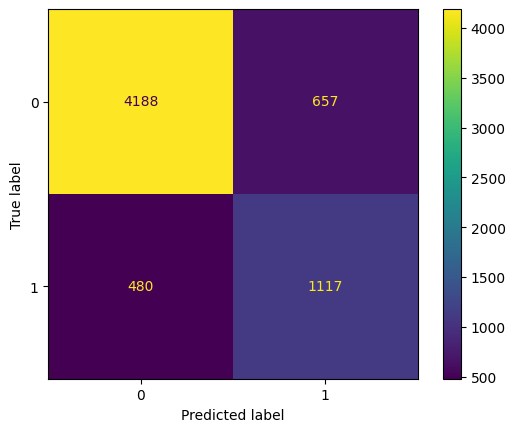

In [ ]:
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_fi)
print(classification_report(y_test,y_pred_fi))

In [ ]:
y_train_sm.value_counts()

,count
income,
0,19602
1,19602


In [ ]:
from imblearn.combine import SMOTEENN

snn=SMOTEENN(random_state=42)
x_train_snn,y_train_snn=snn.fit_resample(x_train_sm,y_train_sm)

In [ ]:
y_train_snn.value_counts(normalize=True)*100

,proportion
income,
1,59.363415
0,40.636585


In [ ]:
b_params=grid_search.best_params_
dt_snn=DecisionTreeClassifier(**b_params,random_state=42)

dt_snn.fit(x_train_snn,y_train_snn)
print(round(dt_snn.score(x_train_snn,y_train_snn),2)*100,' is the training score')

94.0  is the training score


In [ ]:
y_pred_snn=dt_snn.predict(x_test)

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      4845
           1       0.58      0.75      0.65      1597

    accuracy                           0.80      6442
   macro avg       0.74      0.78      0.76      6442
weighted avg       0.83      0.80      0.81      6442



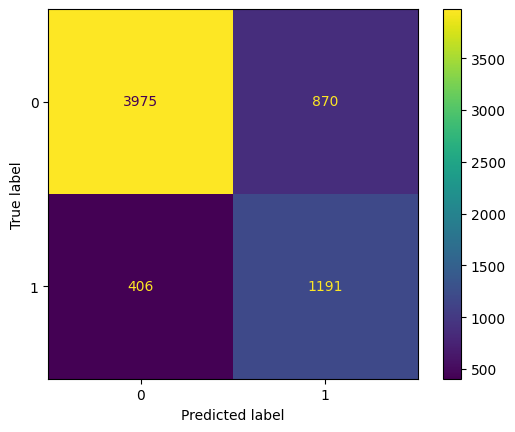

In [ ]:
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_snn)
print(classification_report(y_test,y_pred_snn))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define parameters for GridSearchCV for RandomForestClassifier
params_rf = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [8, 10, 12, 14],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [5, 6, 7],
    'criterion': ['gini', 'entropy']
}

rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=params_rf,
    cv=5,
    n_jobs=-1,
    scoring='f1_macro' # Using f1_macro to account for class imbalance
)

# Fit GridSearchCV on the SMOTEENN resampled data
grid_search_rf.fit(x_train_snn, y_train_snn)

KeyboardInterrupt: 

In [ ]:
print(grid_search_rf.best_params_, 'are the best params for Random Forest')
print('Score for the best params:', round(grid_search_rf.best_score_, 2) * 100, '%')

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
#
# Train the final Random Forest model with the best parameters and SMOTE
b_params_rf = {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}

rf_final = RandomForestClassifier(**b_params_rf, random_state=42)

rf_final.fit(x_train_sm, y_train_sm)
print(round(rf_final.score(x_train_sm, y_train_sm), 2) * 100, 'is the training score for Random Forest')

91.0 is the training score for Random Forest


84.0 is the accuracy score for Random Forest
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4845
           1       0.67      0.74      0.70      1597

    accuracy                           0.84      6442
   macro avg       0.79      0.81      0.80      6442
weighted avg       0.85      0.84      0.85      6442



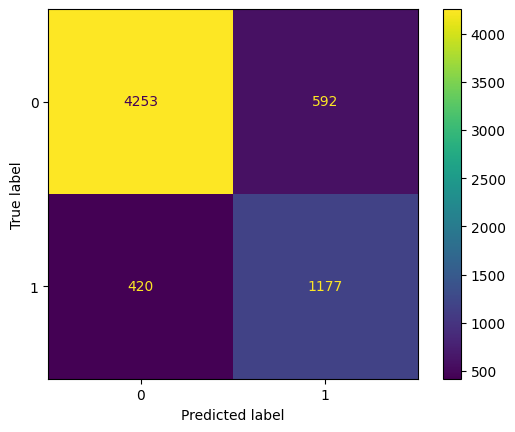

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_final.predict(x_test)

# Evaluate the model
print(round(accuracy_score(y_test, y_pred_rf), 2) * 100, 'is the accuracy score for Random Forest')
cm_rf = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))

RF & ENN


In [ ]:
# Train the final Random Forest model with the best parameters and enn
b_params_rf = {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}

rf_final = RandomForestClassifier(**b_params_rf, random_state=42)

rf_final.fit(x_train_snn, y_train_snn)
print(round(rf_final.score(x_train_snn, y_train_snn), 2) * 100, 'is the training score for Random Forest')

95.0 is the training score for Random Forest


82.0 is the accuracy score for Random Forest
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      4845
           1       0.59      0.81      0.68      1597

    accuracy                           0.82      6442
   macro avg       0.76      0.81      0.78      6442
weighted avg       0.84      0.82      0.82      6442



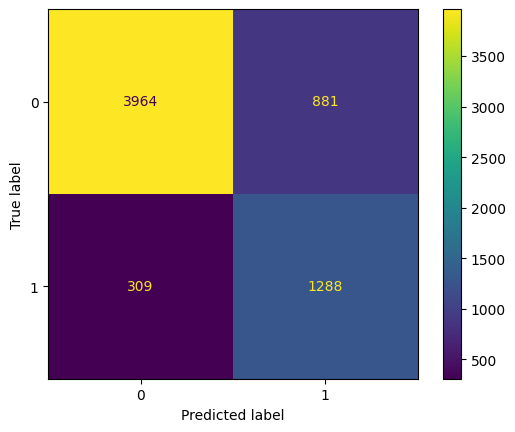

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_final.predict(x_test)

# Evaluate the model
print(round(accuracy_score(y_test, y_pred_rf), 2) * 100, 'is the accuracy score for Random Forest')
cm_rf = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))

Even trying all these the F1-Score is not improved much so lets under sampling technique

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
print("RandomUnderSampler imported successfully.")
rus=RandomUnderSampler(random_state=42)

RandomUnderSampler imported successfully.


In [ ]:
x_rus,y_rus=rus.fit_resample(x,y)

In [ ]:
x_rus_train,x_rus_test,y_rus_train,y_test_rus=train_test_split(x_rus,y_rus,random_state=42,test_size=0.2)

In [ ]:
y_rus_train.value_counts(normalize=True)

,proportion
income,
1,0.500926
0,0.499074


In [ ]:
encode={}

for col in cat_cols[:-1]:
  encode[col]=LabelEncoder()
  x_rus_train[col]=encode[col].fit_transform(x_rus_train[col])

for col in cat_cols[:-1]:
  x_rus_test[col]=encode[col].transform(x_rus_test[col])

In [ ]:
#b_params=grid_search.best_params_
#dt_rus=DecisionTreeClassifier(**b_params,random_state=42)

rf_final.fit(x_rus_train,y_rus_train)
print(round(rf_final.score(x_rus_train,y_rus_train),2)*100,' is the training score')

89.0  is the training score


In [ ]:
x_rus_test=x_rus_test.iloc[:,1:]

83.0 is the accuracy score after RandomUnderSampler
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1564
           1       0.80      0.88      0.84      1541

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



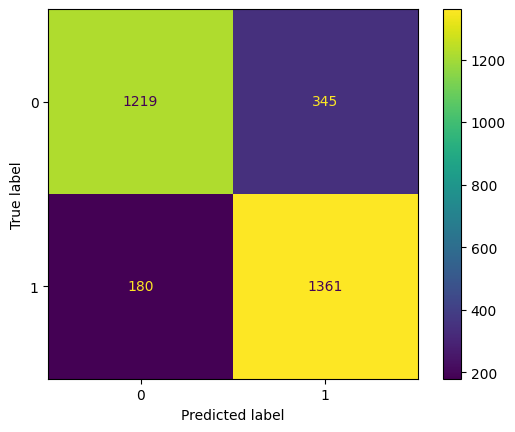

In [ ]:
y_rus_pred=rf_final.predict(x_rus_test)
print(round(accuracy_score(y_test_rus,y_rus_pred),2)*100,'is the accuracy score after RandomUnderSampler')
cm=ConfusionMatrixDisplay.from_predictions(y_test_rus,y_rus_pred)
print(classification_report(y_test_rus,y_rus_pred))